In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules

# **Tải và tiền xử lý dữ liệu**
**Source**: https://grouplens.org/datasets/movielens/

Đây là tập dữ liệu về tên phim và thể loại phim liên quan đến tên phim đó 
Mục đích chính của bài toán là phân tích và áp dụng phương pháp khai phá luật kết hợp để có thể xác định các thể loại phim hay đi cùng nhau và từ đó giúp các nhà làm phim có thể xác định các thể loại phim đi kèm theo khi xây dụng một phim để có thể thu hút khách hàng.
Đồng thời trong tập dữu liệu trên có một có đính kèm theo một tập là rating để cho ra các đánh giá của người dùng về phim

### **Thông tin về các biến:**
### Tập dữ liệu movies
1. **movieID**: Mã của phim
2. **title**: Tên của phim
3. **genres**: Thể loại tương ứng với phim đó
### Tập dữ liệu ratings
1. **userId**: Mã của phim
2. **movieId**: Tên của phim
3. **rating**: Thể loại tương ứng với phim đó


In [3]:
movies = pd.read_csv('movies.csv')


In [4]:
movies.head(10)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


# **Preprocessing**

In [5]:
movies_ohe = movies.drop('genres', axis=1).join(movies.genres.str.get_dummies())


In [6]:
movies_ohe.head()


,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
movies_ohe.shape

(9742, 22)

In [8]:
# Kiểm tra dữ liệu bị thiếu
movies_ohe.isna().sum()

movieId               0
title                 0
(no genres listed)    0
Action                0
Adventure             0
Animation             0
Children              0
Comedy                0
Crime                 0
Documentary           0
Drama                 0
Fantasy               0
Film-Noir             0
Horror                0
IMAX                  0
Musical               0
Mystery               0
Romance               0
Sci-Fi                0
Thriller              0
War                   0
Western               0
dtype: int64

In [9]:
movies_ohe.dtypes

movieId                int64
title                 object
(no genres listed)     int64
Action                 int64
Adventure              int64
Animation              int64
Children               int64
Comedy                 int64
Crime                  int64
Documentary            int64
Drama                  int64
Fantasy                int64
Film-Noir              int64
Horror                 int64
IMAX                   int64
Musical                int64
Mystery                int64
Romance                int64
Sci-Fi                 int64
Thriller               int64
War                    int64
Western                int64
dtype: object

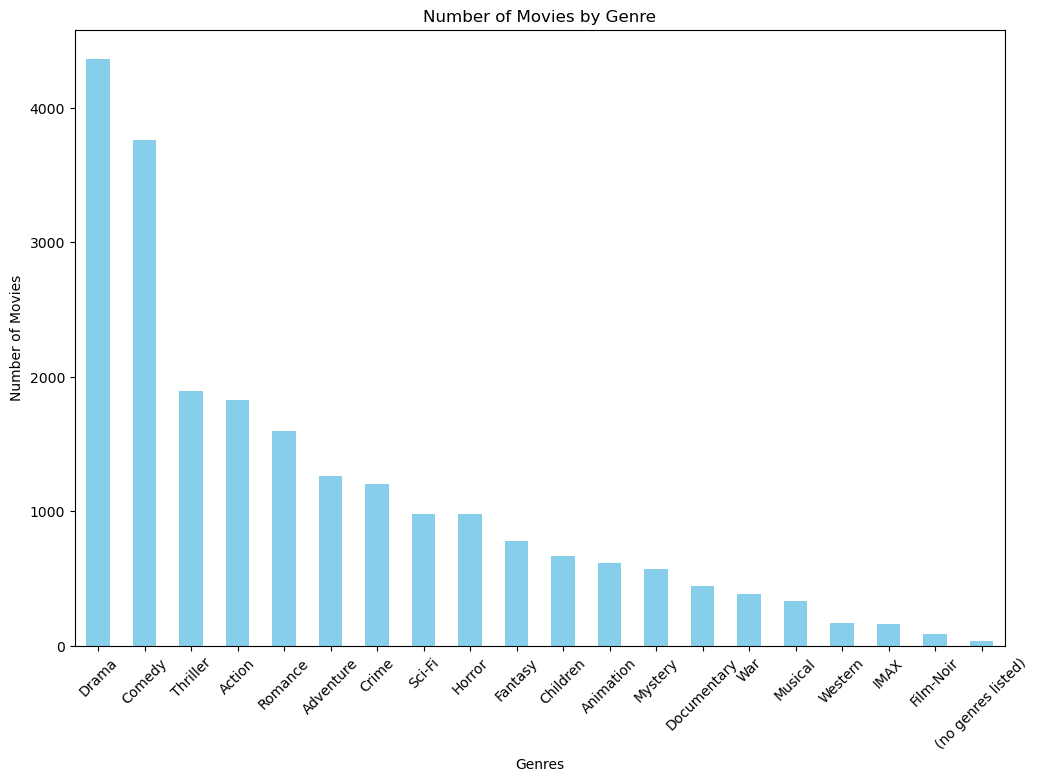

In [10]:
# Loại bỏ cột không phải thể loại
genre_columns = movies_ohe.columns.difference(['movieId', 'title'])

# Tính tổng số phim trong mỗi thể loại
genre_counts = movies_ohe[genre_columns].sum().sort_values(ascending=False)

# Vẽ biểu đồ thanh
plt.figure(figsize=(12, 8))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Movies by Genre')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()


Text(0.5, 1.0, 'distribution of number of genres')

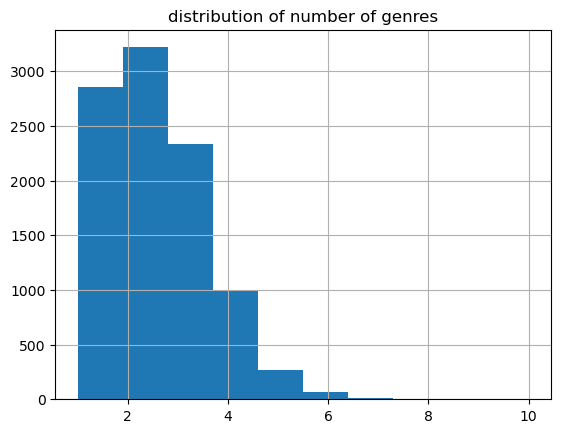

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
movies_ohe.set_index(['movieId','title']).sum(axis=1).hist()
plt.title('distribution of number of genres')

One can always makes some graphical illustration.

Let's get back to analysing the genre associations:

In [12]:
movies_ohe.set_index(['movieId','title'],inplace=True)


In [13]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets_movies = apriori(movies_ohe,use_colnames=True, min_support=0.025)


d:\APP\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [14]:
frequent_itemsets_movies


,support,itemsets
0,0.187641,(Action)
1,0.129645,(Adventure)
2,0.062718,(Animation)
3,0.068158,(Children)
4,0.385547,(Comedy)
5,0.123075,(Crime)
6,0.045165,(Documentary)
7,0.447649,(Drama)
8,0.079963,(Fantasy)
9,0.100390,(Horror)


In [15]:
rules_movies =  association_rules(frequent_itemsets_movies, metric='lift', min_threshold=1.25)


In [16]:
rules_movies.sort_values("lift",ascending=False)[["antecedents","consequents","antecedent support","consequent support","support","confidence","lift"]]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift
17,(Animation),(Children),0.062718,0.068158,0.031000,0.494272,7.251799
16,(Children),(Animation),0.068158,0.062718,0.031000,0.454819,7.251799
10,(Children),(Adventure),0.068158,0.129645,0.032026,0.469880,3.624360
11,(Adventure),(Children),0.129645,0.068158,0.032026,0.247031,3.624360
13,(Fantasy),(Adventure),0.079963,0.129645,0.034285,0.428755,3.307149
12,(Adventure),(Fantasy),0.129645,0.079963,0.034285,0.264450,3.307149
31,(Thriller),(Mystery),0.194416,0.058817,0.036338,0.186906,3.177729
30,(Mystery),(Thriller),0.058817,0.194416,0.036338,0.617801,3.177729
8,(Animation),(Adventure),0.062718,0.129645,0.025354,0.404255,3.118175
9,(Adventure),(Animation),0.129645,0.062718,0.025354,0.195566,3.118175


Kết quả phân tích cho thấy một số thể loại phim có xu hướng kết hợp với nhau một cách phổ biến. Các thể loại như Adventure, Action, Animation, Children, Fantasy, Comedy, Romance, Thriller, Crime, Drama, và War thường xuất hiện cùng nhau trong các bộ phim. Các chỉ số như độ tin cậy (confidence) và lift cho thấy mức độ mạnh mẽ của các luật kết hợp này. Điều này có thể giúp các nhà sản xuất và phân phối phim định hướng và dự đoán sự kết hợp thể loại phim để thu hút khán giả một cách hiệu quả hơn.

In [17]:
rules_movies.sort_values("confidence",ascending=False)[["antecedents","consequents","antecedent support","consequent support","support","confidence","lift"]]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift
26,(War),(Drama),0.039212,0.447649,0.030589,0.780105,1.742669
30,(Mystery),(Thriller),0.058817,0.194416,0.036338,0.617801,3.177729
25,(Romance),(Drama),0.163827,0.447649,0.095874,0.585213,1.307302
20,(Romance),(Comedy),0.163827,0.385547,0.090741,0.553885,1.436620
18,(Children),(Comedy),0.068158,0.385547,0.037159,0.545181,1.414044
17,(Animation),(Children),0.062718,0.068158,0.031000,0.494272,7.251799
37,"(Drama, Crime)",(Thriller),0.065387,0.194416,0.031718,0.485086,2.495096
1,(Adventure),(Action),0.129645,0.187641,0.062615,0.482977,2.573940
23,(Crime),(Thriller),0.123075,0.194416,0.058407,0.474562,2.440963
10,(Children),(Adventure),0.068158,0.129645,0.032026,0.469880,3.624360


In [18]:
def find_related_movies(genre, rules, movies):
    # Tìm các quy tắc liên kết chứa thể loại được nhập vào
    related_rules = rules[rules['antecedents'].apply(lambda x: genre in x)]
    
    # Tạo một danh sách chứa các thể loại phim được liên kết
    related_genres = set()
    
    # Duyệt qua từng quy tắc liên kết
    for idx, row in related_rules.iterrows():
        antecedents = row['antecedents']
        consequents = row['consequents']
        
        # Duyệt qua từng thể loại kết quả
        for consequent in consequents:
            # Thêm các thể loại kết quả vào danh sách
            related_genres.add(consequent)
    
    return related_genres

# Sử dụng hàm để tìm các thể loại phim liên quan
related_genres = find_related_movies('Action', rules_movies, movies)

# In ra các thể loại tương ứng
print("Các thể loại phim liên quan:")
for genre in related_genres:
    print(genre)


Các thể loại phim liên quan:
Thriller
Adventure
Sci-Fi
Crime


In [19]:
def find_related_movies(genre, rules, movies):
    # Tìm các quy tắc liên kết chứa thể loại được nhập vào
    related_rules = rules[rules['antecedents'].apply(lambda x: genre in x)]
    
    # Tạo một danh sách chứa các phim được liên kết
    related_movies = set()
    
    # Duyệt qua từng quy tắc liên kết
    for idx, row in related_rules.iterrows():
        antecedents = row['antecedents']
        consequents = row['consequents']
        
        # Duyệt qua từng thể loại kết quả
        for consequent in consequents:
            # Thêm các phim có thể loại kết quả vào danh sách
            related_movies.update(movies[movies['genres'].str.contains(consequent)]['title'])
    
    return related_movies

# Sử dụng hàm để tìm các phim liên quan
related_movies = find_related_movies('Action', rules_movies, movies)

# In ra các phim tương ứng
for movie in related_movies:
    print(movie)


Crossfire (1947)
Hogfather (Terry Pratchett's Hogfather) (2006)
Blown Away (1994)
Fireworks (Hana-bi) (1997)
Ugly, The (1997)
Spring (2015)
Futurama: The Beast with a Billion Backs (2008)
Once a Thief (Zong heng si hai) (1991)
Black Robe (1991)
800 Bullets (800 Balas) (2002)
Captain Horatio Hornblower R.N. (1951)
Hard Day's Night, A (1964)
Spawn (1997)
Shadow of a Doubt (1943)
Dawn of the Dead (2004)
Crank (2006)
Muppet Movie, The (1979)
Sting, The (1973)
2 Guns (2013)
Underneath (1995)
Abandoned, The (2006)
Asphalt Jungle, The (1950)
Nine to Five (a.k.a. 9 to 5) (1980)
Darkness Falls (2003)
Indiana Jones and the Last Crusade (1989)
Grand Canyon (1991)
Lord of the Rings, The (1978)
Ice Age 2: The Meltdown (2006)
Texas Chainsaw Massacre: The Beginning, The (2006)
Godzilla (Gojira) (1954)
Red Hill (2010)
Hunt For Gollum, The (2009)
Brazil (1985)
Miracle Mile (1989)
Child, The (L'enfant) (2005)
Paradox (2010)
Elektra (2005)
Infernal Affairs 2 (Mou gaan dou II) (2003)
Mutiny on the Bounty 

### Hệ thống gợi ý
### Matrix Factorization With SVD

In [20]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [21]:
rating_df = pd.read_csv("ratings.csv",low_memory=False)
movie_df = pd.read_csv("movies.csv")


In [22]:
rating = rating_df[rating_df['rating'] != -1]
rating.drop_duplicates(inplace=True)
rating.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [23]:
rating.shape

(100836, 3)

In [24]:
rating = rating.sort_values('userId')
rating.head()

,userId,movieId,rating
0,1,1,4.0
147,1,2329,5.0
148,1,2338,2.0
149,1,2353,5.0
150,1,2366,4.0


In [32]:
from surprise import Reader, Dataset
import pandas as pd

reader = Reader(rating_scale=(1, 5))

rating_sample = rating.sample(frac=1)[:70000].sort_values('userId')

rating_sample = rating_sample[['userId', 'movieId', 'rating']]

# Load the dataset from the DataFrame
rating_dataset = Dataset.load_from_df(rating_sample, reader)


In [33]:
svd = SVD()
# svd.fit(rating_dataset.build_full_trainset())
cross_validate(svd, rating_dataset, measures=["RMSE", "MAE"], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8943  0.8909  0.8699  0.8779  0.8871  0.8840  0.0089  
MAE (testset)     0.6885  0.6838  0.6707  0.6749  0.6815  0.6799  0.0063  
Fit time          0.47    0.50    0.50    0.48    0.49    0.49    0.01    
Test time         0.05    0.06    0.05    0.13    0.05    0.07    0.03    


{'test_rmse': array([0.89425222, 0.89093202, 0.86989689, 0.87785558, 0.88707343]),
 'test_mae': array([0.68850453, 0.6837992 , 0.67070914, 0.67490148, 0.68147738]),
 'fit_time': (0.4684476852416992,
  0.5000283718109131,
  0.49521875381469727,
  0.4847078323364258,
  0.48539090156555176),
 'test_time': (0.05098271369934082,
  0.05830502510070801,
  0.050750017166137695,
  0.13231635093688965,
  0.05090975761413574)}

In [34]:
rating

,userId,movieId,rating
0,1,1,4.0
147,1,2329,5.0
148,1,2338,2.0
149,1,2353,5.0
150,1,2366,4.0
...,...,...,...
99963,610,6387,3.5
99962,610,6383,2.5
99961,610,6378,3.5
99979,610,6708,3.5


In [35]:
user_id = 100
all_movies = rating.movieId.unique()
watched = rating[rating['userId'] == user_id].movieId
not_watched = [movie for movie in all_movies if movie not in watched]

In [36]:
# Predict
rating_predict = [svd.predict(user_id, movie_id) for movie_id in not_watched]
movie_id_pred = []
rating_pred = []
for i in range(0, len(rating_predict)):
    movie_id_pred.append(rating_predict[i].iid)
    rating_pred.append(rating_predict[i].est)
df_pred = pd.DataFrame({'movieId':movie_id_pred, 'pred_rating':rating_pred})

In [37]:
df_pred = df_pred.sort_values('pred_rating', ascending=False)
df_pred = df_pred.merge(movie_df.drop_duplicates(), how='left', on='movieId')
df_pred = df_pred[['movieId','title','pred_rating']]

In [38]:
print(f"Dự đoán đánh giá Score của user có id = {user_id} cho các bộ phim chưa coi từ cao đến thấp là: ")
df_pred.head(10)

Dự đoán đánh giá Score của user có id = 100 cho các bộ phim chưa coi từ cao đến thấp là: 


,movieId,title,pred_rating
0,5618,Spirited Away (Sen to Chihiro no kamikakushi) ...,4.737524
1,1204,Lawrence of Arabia (1962),4.590031
2,750,Dr. Strangelove or: How I Learned to Stop Worr...,4.584446
3,2160,Rosemary's Baby (1968),4.562526
4,858,"Godfather, The (1972)",4.546044
5,246,Hoop Dreams (1994),4.536852
6,48516,"Departed, The (2006)",4.512469
7,68157,Inglourious Basterds (2009),4.499762
8,1193,One Flew Over the Cuckoo's Nest (1975),4.489448
9,1217,Ran (1985),4.485806


Giải thích kết quả: kết quả trả về là dự đoán đánh giá của user về các bộ phim chưa coi và sắp xếp chúng theo thứ tự từ cao đến thấp để có thể gợi ý cho người dùng những phim phù hợp với sở thích của người dùng